In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./mushroom_cleaned.csv")

In [5]:
df.head(20)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [6]:
df.shape

(54035, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


- cap-diameter: Đường kính mũ nấm
- cap-shape: Hình dạng mũ nấm
- gill-attachment: Vị trí bám của mang nấm
- gill-color: Màu sắc của mang nấm
- stem-height: Chiều cao của thân nấm
- stem-width: Chiều rộng của thân nấm
- stem-color: Màu sắc của thân nấm
- season: Mùa nấm mọc
- class: Loại nấm

# Phân tích theo tần suất

- Số lượng loại nấm ăn được và nấm có độc 
   -  0 : Ăn được
    - 1 : Có độc

In [8]:
df_class = df["class"].value_counts()
df_class

class
1    29675
0    24360
Name: count, dtype: int64

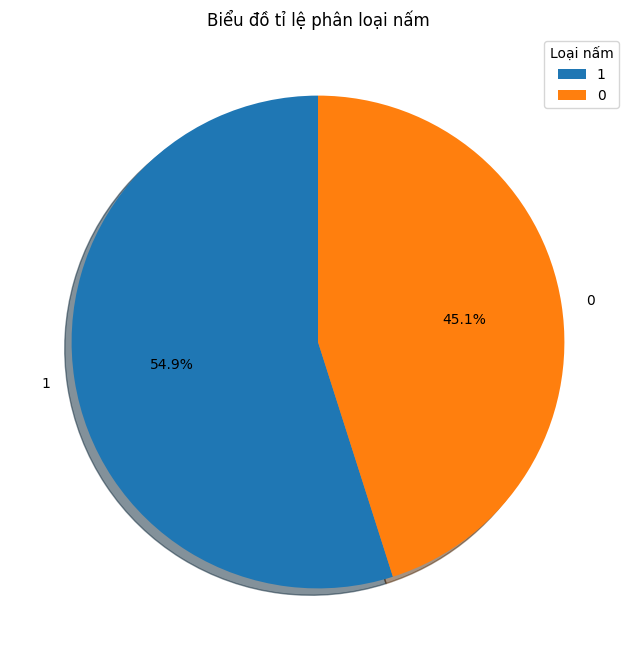

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(df_class.values, labels=df_class.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Biểu đồ tỉ lệ phân loại nấm')
plt.legend(title="Loại nấm", bbox_to_anchor=(1, 1))
plt.show()

- Hình dạng mũ nấm phổ biến nhất

In [10]:
df_cap_shape = df["cap-shape"].value_counts()
df_cap_shape

cap-shape
6    23377
2    12294
5     6889
0     5273
3     2780
1     1722
4     1700
Name: count, dtype: int64

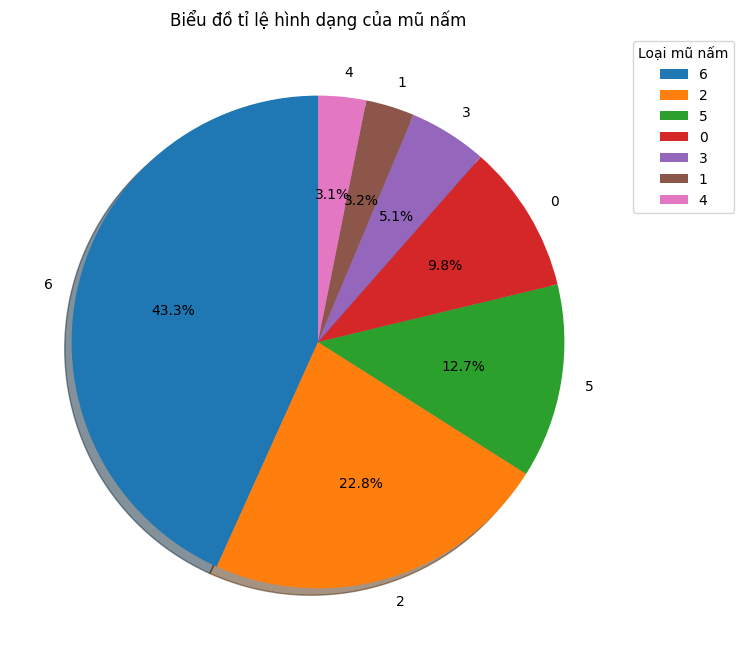

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(df_cap_shape.values, labels=df_cap_shape.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Biểu đồ tỉ lệ hình dạng của mũ nấm')
plt.legend(title="Loại mũ nấm", bbox_to_anchor=(1, 1))
plt.show()

- Màu sắc mang nấm phổ biến nhất

In [12]:
df_gill_color = df["gill-color"].value_counts()
df_gill_color

gill-color
10    16531
11     8214
5      8154
7      5455
3      3847
2      3042
6      2714
4      1772
8      1271
1      1059
9      1023
0       953
Name: count, dtype: int64

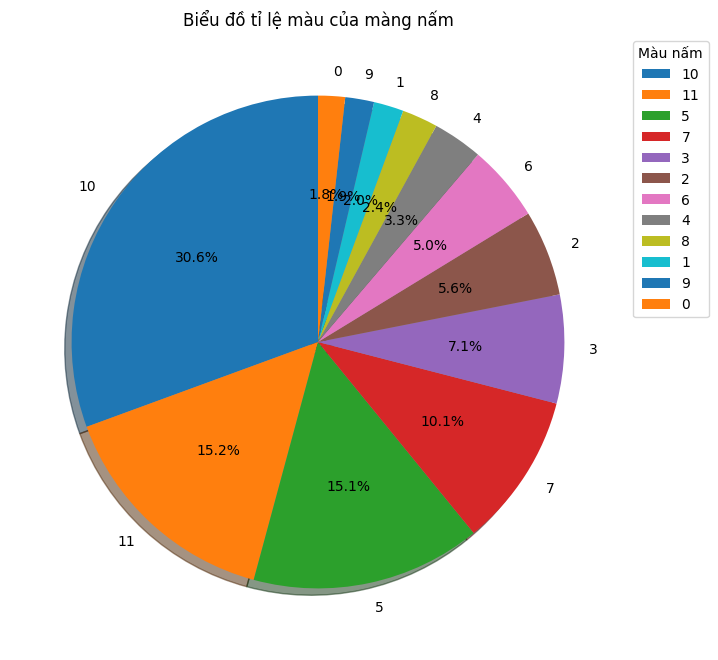

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(df_gill_color.values, labels=df_gill_color.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Biểu đồ tỉ lệ màu của màng nấm')
plt.legend(title="Màu nấm", bbox_to_anchor=(1, 1))
plt.show()

- Nấm mọc vào mùa nào phổ biến nhất

In [14]:
df_season = df["season"].value_counts()
df_season

season
0.943195    27210
0.888450    20387
1.804273     4219
0.027372     2219
Name: count, dtype: int64

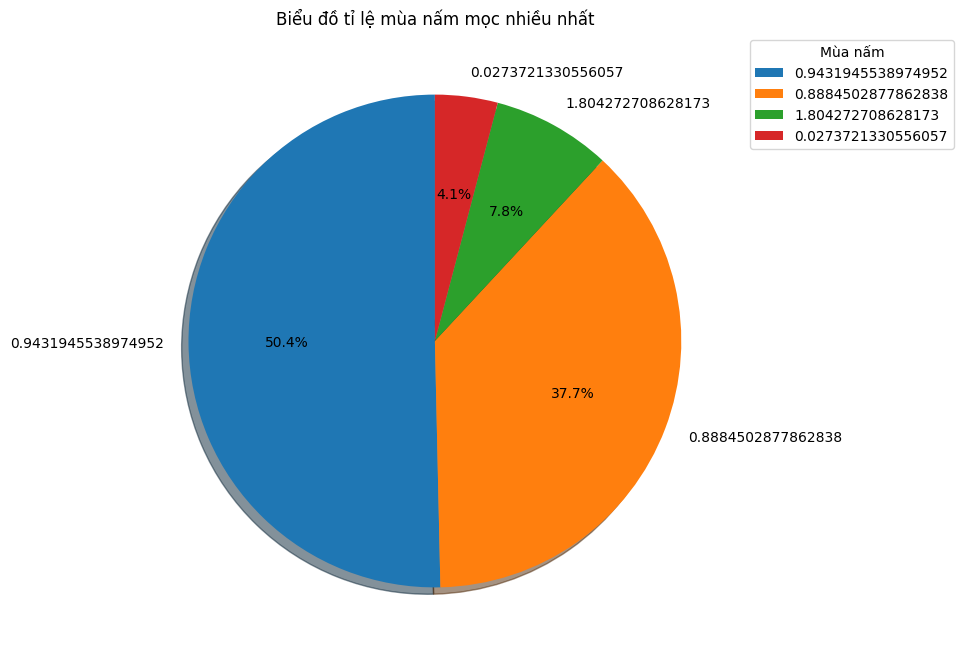

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(df_season.values, labels=df_season.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Biểu đồ tỉ lệ mùa nấm mọc nhiều nhất')
plt.legend(title="Mùa nấm", bbox_to_anchor=(1, 1))
plt.show()

# Phân tích mối tương quan

- Có mối tương quan nào giữa đường kính mũ nấm và chiều cao thân nấm không?

In [16]:
#Tính số lượng nấm theo đường kính mũ nấm
df_cap_diameter = df["cap-diameter"]
df_cap_diameter

0        1372
1        1461
2        1371
3        1261
4        1305
         ... 
54030      73
54031      82
54032      82
54033      79
54034      72
Name: cap-diameter, Length: 54035, dtype: int64

In [17]:
# Tính số lượng nấm theo chiều cao nấm
df_stem_height = df["stem-height"]
df_stem_height

0        3.807467
1        3.807467
2        3.612496
3        3.787572
4        3.711971
           ...   
54030    0.887740
54031    1.186164
54032    0.915593
54033    1.034963
54034    1.158311
Name: stem-height, Length: 54035, dtype: float64

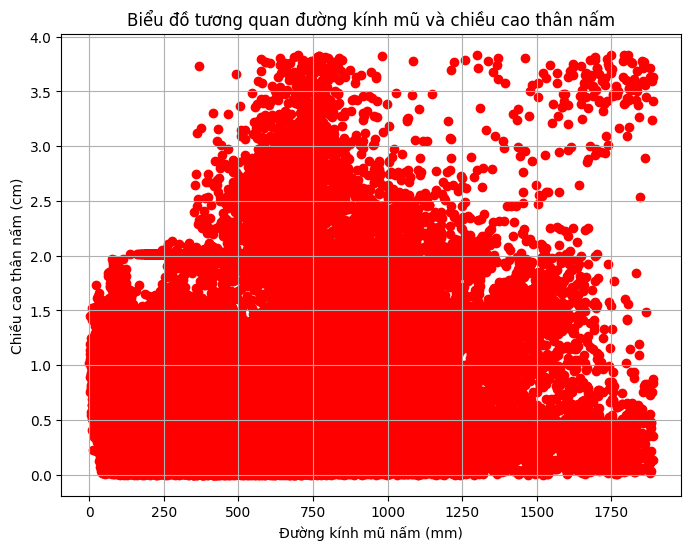

In [20]:
plt.figure(figsize=(8, 6))  # Set figure size

# Plot scatter points with red color
plt.scatter(df_cap_diameter, df_stem_height, color="red")

# Add labels and title
plt.xlabel("Đường kính mũ nấm (mm)")
plt.ylabel("Chiều cao thân nấm (cm)")
plt.title("Biểu đồ tương quan đường kính mũ và chiều cao thân nấm")

# Display grid lines
plt.grid(True)

# Show the plot
plt.show()  

- Có mối tương quan nào giữa màu sắc mang nấm và màu sắc thân nấm không?

- Có mối tương quan nào giữa mùa nấm mọc và loại nấm không?

# Phân tích phân cụm

- Phân chia tập dữ liệu thành các nhóm nấm dựa trên các đặc điểm của chúng